In [3]:
import numpy as np
import matplotlib.pyplot as plt

## The Verlet integrator
$$
r(t+\delta t) = 2r(t)-r(t-\delta t)+\frac{f(t)}{m}\delta t^2+\mathcal{O}(\delta t^4)
$$
$$
v(t)=\frac{r(t+\delta t)-r(t-\delta t)}{2\delta t}+\mathcal{O}(\delta t^2)
$$

In [4]:
class AnharmParticle:
    def __init__(self, x0, v0, dt, maxiter):
        # Initial conditions
        self.x0 = x0
        self.v0 = v0
        self.a0 = None
        self.iter = 0 # So that the storage index is intuitive
        
        # integrator
        self.dt = dt
        
        # Properties
        self.x = None
        self.v = None
        self.a = None
        self.ke = None
        self.pe = None
        self.etot = None
        
        # Scratch variable for Verlet
        self.x_old = None
        
        # Data storage
        self.maxiter = maxiter
        self.x_traj = np.zeros(maxiter)
        self.v_traj = np.zeros(maxiter)
        
        self.initialise()
        
    def initialise(self):
        if (self.iter != 0):
            raise RuntimeError("AnharmParticle.initialise() called after initialisation")
        else:
            self.x = self.x0
            self.v = self.v0
            self.energyEval()
            self.forceEval()
            self.a0 = self.a # So that the complete set of initial conditions is available
            self.x_traj[self.iter] = self.x
            self.v_traj[self.iter] = self.v
            self.iter += 1
    
    def energyEval(self):
        self.ke = 0.5 * self.v**2
        self.pe = 0.5 - self.x**2 + 0.5*self.x**4
        self.etot = self.ke + self.pe
        
    def forceEval(self):
        self.a = 2*self.x - 2*self.x**3
    
    def run_MD(self):
        while self.iter < self.maxiter:
            self.verletStep()
            self.x_traj[self.iter] = self.x
            self.v_traj[self.iter] = self.v
            self.iter += 1
    
    def reset(self):
        self.iter = 0
        self.initialise()
        
    def eulerStep(self):
        self.x = self.x + self.v * self.dt
        self.v = self.v + self.a * self.dt
        self.forceEval()
        
    def verletStep(self):
        if self.iter == 1:
            # first Verlet iteration has to be Euler
            self.x_old = self.x + self.v * self.dt
            self.forceEval()
        
        x_new = 2*self.x - self.x_old + self.a*(self.dt**2)
        self.v = (x_new - self.x_old)/(2*self.dt)
        self.x_old = self.x
        self.x = x_new
        self.forceEval()

Text(0, 0.5, '$v$')

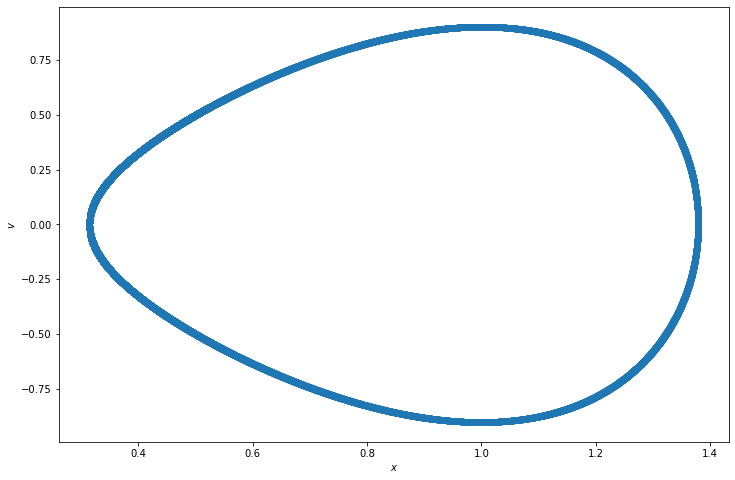

In [11]:
p1 = AnharmParticle(0.5, 0.5, 0.001, 10000)
p1.run_MD()

f,ax = plt.subplots(figsize=(12,8))
ax.scatter(p1.x_traj,p1.v_traj)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$v$')

In [27]:
p1.x_traj

array([ 0.00000000e+00, -1.00000000e-03, -2.00000200e-03, ...,
        1.55365806e+00,  1.55362393e+00,  0.00000000e+00])